# EDA (Exploratory Data Analysis)
Look at the features in the training data, see how they correlate with each other and the target variable (asking price). This will help inform which features to use or engineer for the model.

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# increase cell width
from IPython.display import HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
DATA_FOLDER = os.path.join('data', 'final')

Read in our training dataset

In [4]:
zoopla_df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'zoopla_train.csv'), dtype=str)

Look at unique values and null values

In [5]:
# unique values
zoopla_df_train.nunique()

listing_id                                 610
parish                                       5
post_town                                    2
postcode                                    17
latitude                                   546
longitude                                  553
num_bedrooms                                 8
num_bathrooms                                5
price                                      186
property_type_general                        8
CURRENT_ENERGY_RATING_mode                   5
POTENTIAL_ENERGY_RATING_mode                 4
TOTAL_FLOOR_AREA_median                    208
NUMBER_HABITABLE_ROOMS_mode                  8
CONSTRUCTION_AGE_BAND_mode                  12
Index of Multiple Deprivation Decile        10
Income Decile                               10
Employment Decile                           10
Education and Skills Decile                 10
Health and Disability Decile                10
Crime Decile                                10
Barriers to H

In [6]:
# value counts for each variable
for col in zoopla_df_train.columns:
    display(zoopla_df_train[col].value_counts(dropna=False))

63108617    1
63871553    1
63821062    1
62348098    1
63621880    1
           ..
63756326    1
62419254    1
62029847    1
62579957    1
63482282    1
Name: listing_id, Length: 610, dtype: int64

Nuneaton and Bedworth, unparished area    396
Hinckley and Bosworth, unparished area    189
Burbage                                    10
Other                                       9
Stoke Golding                               6
Name: parish, dtype: int64

Nuneaton    411
Hinckley    199
Name: post_town, dtype: int64

LE10 0    121
CV11 6     93
CV10 9     73
LE10 1     64
CV10 0     60
CV10 8     45
CV11 4     45
CV10 7     42
CV11 5     24
CV11 7     14
CV13 6      9
LE10 2      8
LE10 3      6
CV13 0      3
LE9 7       1
CV12 9      1
CV9 3       1
Name: postcode, dtype: int64

52.537514             15
52.52016999999999      9
52.543385              7
52.513065000000005     3
52.527702000000005     3
                      ..
52.54820600000001      1
52.536564              1
52.535637              1
52.519684              1
52.53609               1
Name: latitude, Length: 546, dtype: int64

-1.434415              15
-1.4552873              9
-1.447905               7
-1.397891               3
-1.493124               3
                       ..
-1.469778               1
-1.47189                1
-1.462381               1
-1.4621959999999998     1
-1.4500879999999998     1
Name: longitude, Length: 553, dtype: int64

3    277
4    148
2    140
5     18
1     15
0      7
7      3
6      2
Name: num_bedrooms, dtype: int64

1    335
2    174
0     51
3     43
4      7
Name: num_bathrooms, dtype: int64

250000.0    28
260000.0    23
240000.0    23
300000.0    20
325000.0    19
            ..
424995.0     1
98000.0      1
745000.0     1
32500.0      1
575000.0     1
Name: price, Length: 186, dtype: int64

Detached house         203
Semi-detached house    188
Terraced house          80
Flat                    51
Bungalow                34
End terrace house       29
Other/Unknown           21
Maisonette               4
Name: property_type_general, dtype: int64

4.0    253
3.0    110
2.0     98
NaN     97
5.0     46
6.0      6
Name: CURRENT_ENERGY_RATING_mode, dtype: int64

2.0    337
3.0    110
NaN     97
1.0     64
4.0      2
Name: POTENTIAL_ENERGY_RATING_mode, dtype: int64

NaN                   97
96.0                  13
79.0                  13
84.0                  12
77.0                  12
                      ..
54.7                   1
165.5                  1
80.28396000000001      1
61.653000000000006     1
46.5                   1
Name: TOTAL_FLOOR_AREA_median, Length: 209, dtype: int64

NaN    188
5.0    152
4.0    108
3.0     57
6.0     57
7.0     26
2.0     11
8.0      8
9.0      3
Name: NUMBER_HABITABLE_ROOMS_mode, dtype: int64

NaN     161
2.0      69
5.0      62
4.0      54
3.0      47
7.0      41
9.0      32
12.0     32
10.0     29
8.0      24
6.0      24
1.0      23
11.0     12
Name: CONSTRUCTION_AGE_BAND_mode, dtype: int64

8      140
6       69
4       66
3       58
5       56
9       54
10      53
1       36
2       32
7       27
NaN     19
Name: Index of Multiple Deprivation Decile, dtype: int64

9      117
7      103
5       80
4       66
10      53
3       48
2       39
6       38
8       25
1       22
NaN     19
Name: Income Decile, dtype: int64

6      126
8       99
9       88
4       68
3       62
2       41
7       36
5       35
1       31
NaN     19
10       5
Name: Employment Decile, dtype: int64

3      100
5       94
4       86
8       83
1       62
2       55
9       48
7       32
6       25
NaN     19
10       6
Name: Education and Skills Decile, dtype: int64

7      97
5      88
4      84
6      78
3      65
9      58
8      44
2      44
NaN    19
1      17
10     16
Name: Health and Disability Decile, dtype: int64

4      115
6       89
7       86
3       62
8       48
9       45
1       45
5       38
2       37
10      26
NaN     19
Name: Crime Decile, dtype: int64

8      102
4       96
9       91
7       87
3       69
10      67
5       39
6       26
NaN     19
1       13
2        1
Name: Barriers to Housing and Services Decile, dtype: int64

6      105
9       96
4       86
10      84
8       53
5       52
2       48
7       33
3       29
NaN     19
1        5
Name: Living Environment Decile, dtype: int64

9      96
5      96
8      92
4      64
6      64
7      56
2      36
1      36
3      30
10     21
NaN    19
Name: IDACI Decile, dtype: int64

9      101
5       96
8       93
6       78
4       54
10      52
7       42
2       33
1       23
3       19
NaN     19
Name: IDAOPI Decile, dtype: int64

None      574
NaN        27
Medium      5
Low         4
Name: PROB_4BAND, dtype: int64

0     260
1      97
2      81
3      56
4      39
5      28
7      18
6      13
9       6
10      3
11      2
12      2
16      1
18      1
14      1
8       1
27      1
Name: diff_published_date, dtype: int64

2023    429
2022    181
Name: last_published_year, dtype: int64

1     292
2     137
11     78
12     47
10     37
9      11
8       6
6       1
3       1
Name: last_published_month, dtype: int64

2022    423
2023    179
2021      7
2020      1
Name: first_published_year, dtype: int64

1     155
10     97
11     88
9      78
12     50
8      46
7      33
2      28
6      21
3       6
4       5
5       3
Name: first_published_month, dtype: int64

Later we will set null values in numeric values to 0 (with a new column that is a flag (bool) if the value is null). We will also apply caps and aggregate some values to remove rare values or values that are in the test set but not the training set.

listing_id                                  0.000000
parish                                      0.000000
post_town                                   0.000000
postcode                                    0.000000
latitude                                    0.000000
longitude                                   0.000000
num_bedrooms                                0.000000
num_bathrooms                               0.000000
price                                       0.000000
property_type_general                       0.000000
CURRENT_ENERGY_RATING_mode                 15.901639
POTENTIAL_ENERGY_RATING_mode               15.901639
TOTAL_FLOOR_AREA_median                    15.901639
NUMBER_HABITABLE_ROOMS_mode                30.819672
CONSTRUCTION_AGE_BAND_mode                 26.393443
Index of Multiple Deprivation Decile        3.114754
Income Decile                               3.114754
Employment Decile                           3.114754
Education and Skills Decile                 3.

<AxesSubplot:>

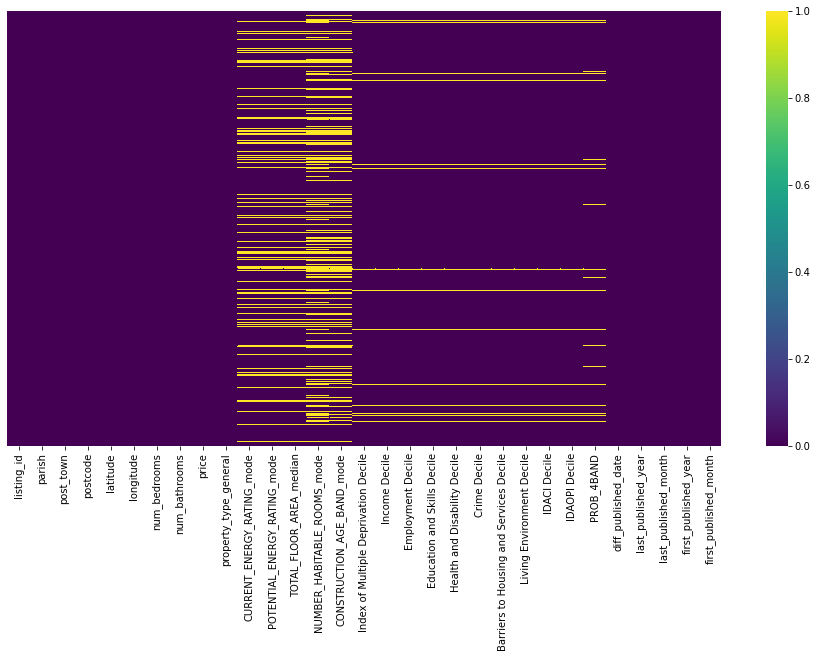

In [7]:
# null values (as a percentage of all records and as a heatmap)
display(100*zoopla_df_train.isnull().sum()/len(zoopla_df_train))
plt.figure(figsize=(16,8))
sns.heatmap(zoopla_df_train.isnull(), cmap='viridis', yticklabels=False)

### Separate out into numeric and categoric columns

In [8]:
numeric_cols = ['latitude', 'longitude', 'num_bedrooms', 'num_bathrooms', 'CURRENT_ENERGY_RATING_mode',
       'POTENTIAL_ENERGY_RATING_mode', 'TOTAL_FLOOR_AREA_median', 'CONSTRUCTION_AGE_BAND_mode',
       'Index of Multiple Deprivation Decile', 'Income Decile',
       'Employment Decile', 'Education and Skills Decile',
       'Health and Disability Decile', 'Crime Decile',
       'Barriers to Housing and Services Decile', 'Living Environment Decile',
       'IDACI Decile', 'IDAOPI Decile', 'diff_published_date',
       'last_published_year', 'last_published_month', 'first_published_year',
       'first_published_month', 'price']
zoopla_df_train[numeric_cols] = zoopla_df_train[numeric_cols].astype(float)

In [9]:
categoric_cols = ['post_town', 'parish', 'postcode', 'PROB_4BAND', 'property_type_general']

### Correlation Plots

<AxesSubplot:>

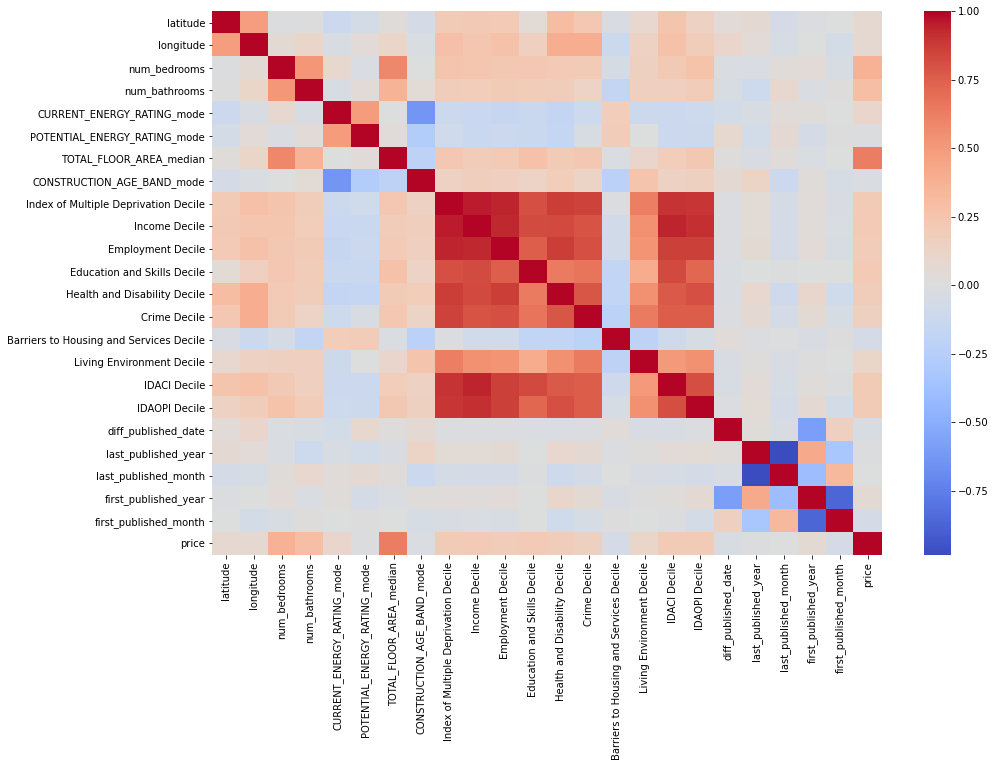

In [10]:
# correlations of all numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(zoopla_df_train[numeric_cols].corr(), cmap='coolwarm')

Can see the income, employment, education, crime etc variables are highly positively correlated. Construction age band and EPC are negatively correlated. Let's look in more detail at these.

#### Look at individual plots in more detail

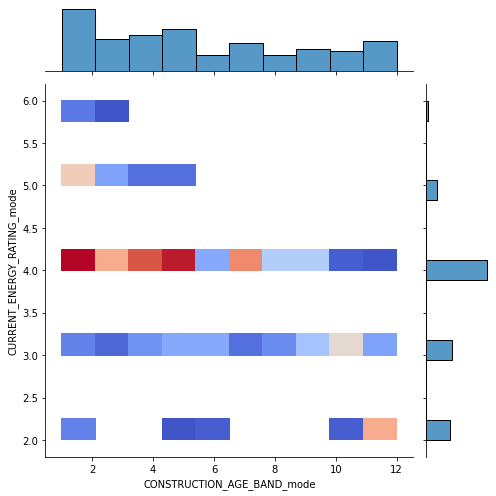

In [11]:
# construction age vs EPC. Higher EPC number means worse rating. Higher construction age band means more recent.
sns.jointplot(x=zoopla_df_train['CONSTRUCTION_AGE_BAND_mode'], y=zoopla_df_train['CURRENT_ENERGY_RATING_mode'], kind='hist', cmap='coolwarm', height=7)

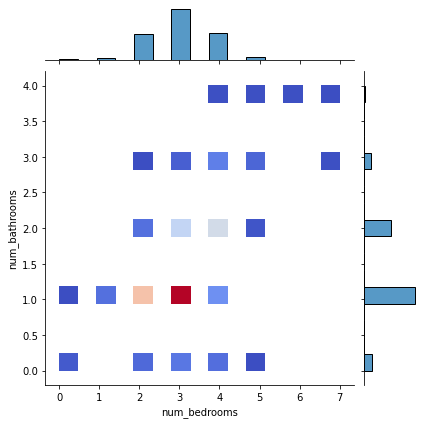

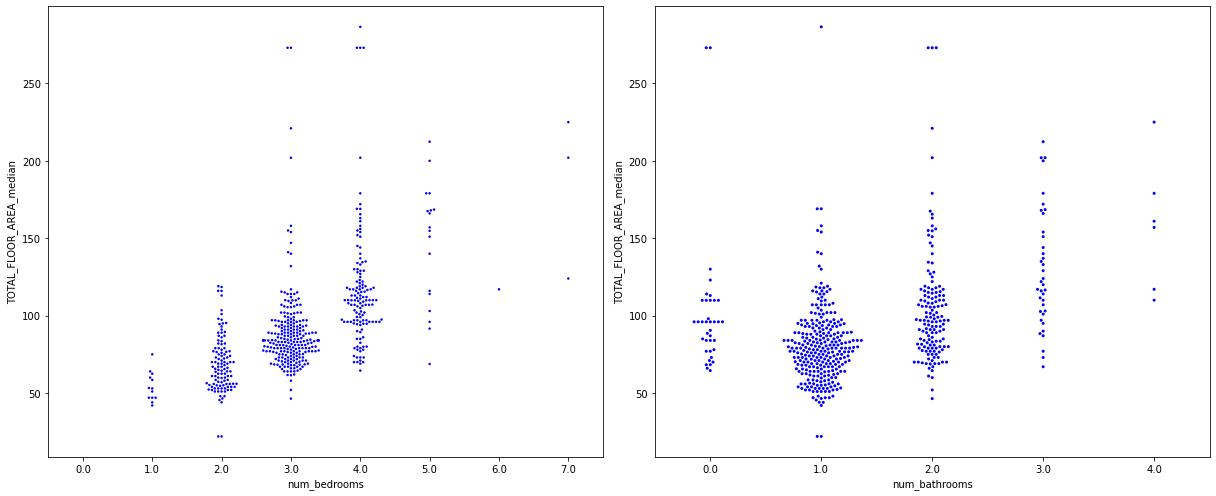

In [12]:
# number bedrooms, number bathrooms and total floor area
sns.jointplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['num_bathrooms'], kind='hist', cmap='coolwarm')

fig, ax = plt.subplots(1, 2, figsize=(17, 7))
sns.swarmplot(x=zoopla_df_train['num_bedrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], s=2.5, color='b', ax=ax[0])
sns.swarmplot(x=zoopla_df_train['num_bathrooms'], y=zoopla_df_train['TOTAL_FLOOR_AREA_median'], s=3, color='b', ax=ax[1])
plt.tight_layout()

<AxesSubplot:xlabel='num_bathrooms', ylabel='count'>

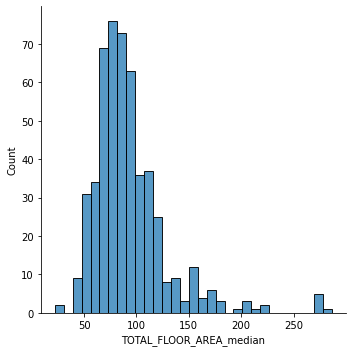

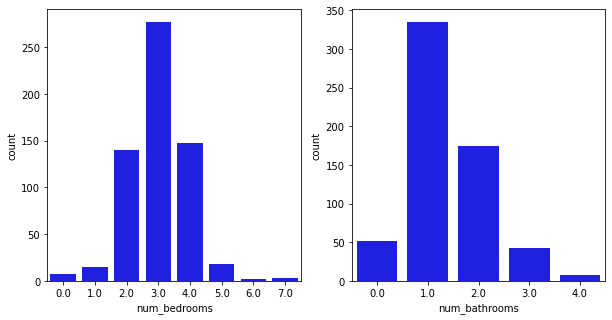

In [13]:
# 1D plots of total floor area, num bedrooms and bathrooms

sns.displot(zoopla_df_train['TOTAL_FLOOR_AREA_median'])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=zoopla_df_train['num_bedrooms'], ax=ax[0], color='b')
sns.countplot(x=zoopla_df_train['num_bathrooms'], ax=ax[1], color='b')

### Correlation plots on target variable, price

<AxesSubplot:>

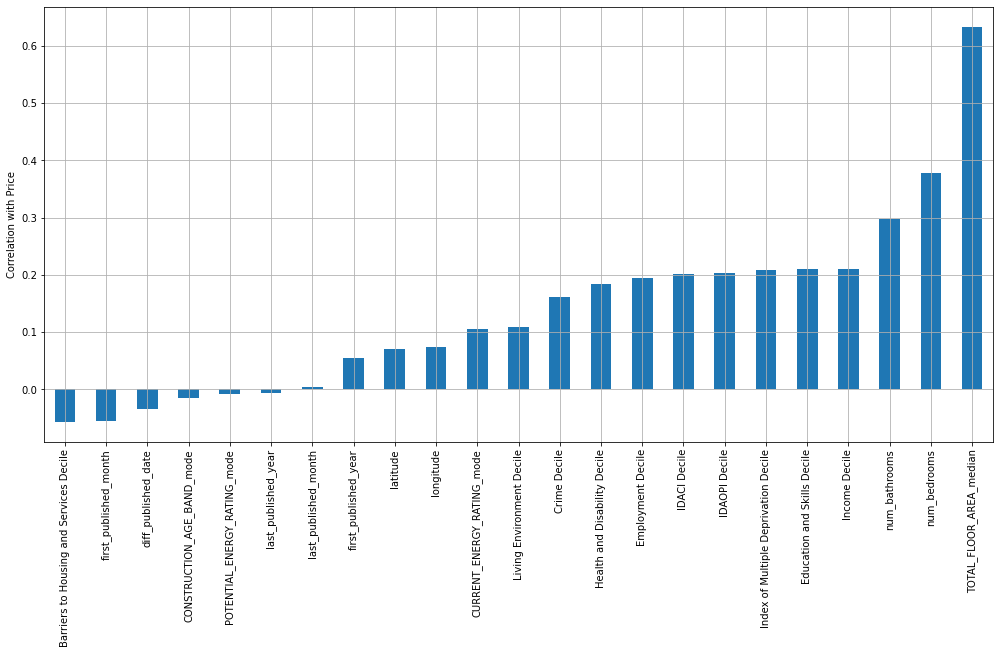

In [14]:
plt.figure(figsize=(17, 8))
display(zoopla_df_train[numeric_cols].astype(float).corr()[:-1]['price'].sort_values().plot(kind='bar'))
plt.ylabel('Correlation with Price')
plt.grid()

#### Look at some of these in more detail

In [15]:
def plot_graph(x_col, y_col, kind, y_lim, var_order=None):
    
    """
    Create 2D plots of x vs y, where the kind of plot can be specificed, maximum y limit and order
    from left to right of the x variable values
    """
    
    fig = plt.figure(figsize=(12, 8))
    
    if kind == 'scatter':
        sns.scatterplot(x=x_col, y=y_col)
    elif kind == 'violin':
        sns.violinplot(x=x_col, y=y_col, order=var_order)
    elif kind == 'box':
        sns.boxplot(x=x_col, y=y_col, order=var_order)
    elif kind == 'hist':
        g = sns.jointplot(x=x_col, y=y_col, kind='hist', cmap='coolwarm')
        g.fig.set_figwidth(12)
        g.fig.set_figheight(8)
    elif kind == 'hex':
        g = sns.jointplot(x=x_col, y=y_col, kind='hex')
        g.fig.set_figwidth(12)
        g.fig.set_figheight(6)
    
    plt.ylim((0, y_lim))
    plt.xlabel(x_col.name.title(), fontsize=15)
    plt.xticks(fontsize=14, rotation=90)
    plt.ylabel('Price', fontsize=15)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    

<ipython-input-15-2feeb2124b3c>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 8))


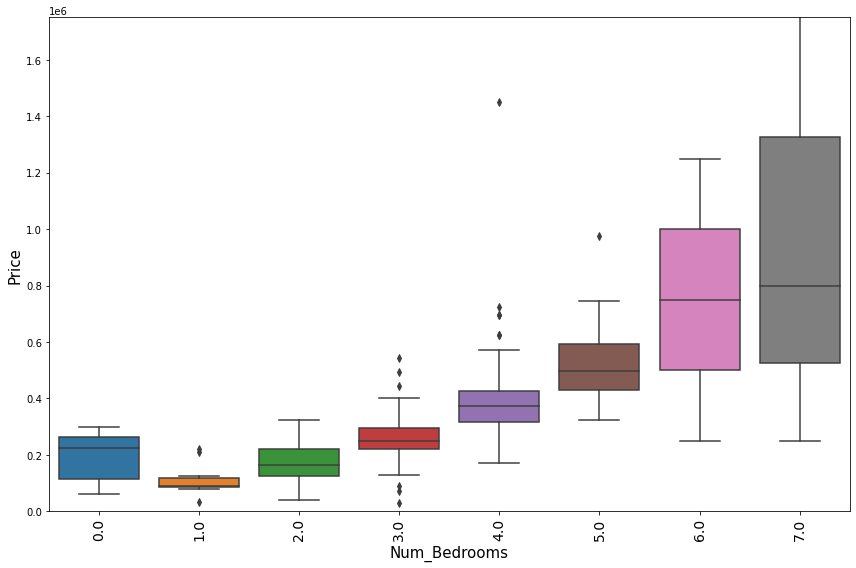

<Figure size 864x576 with 0 Axes>

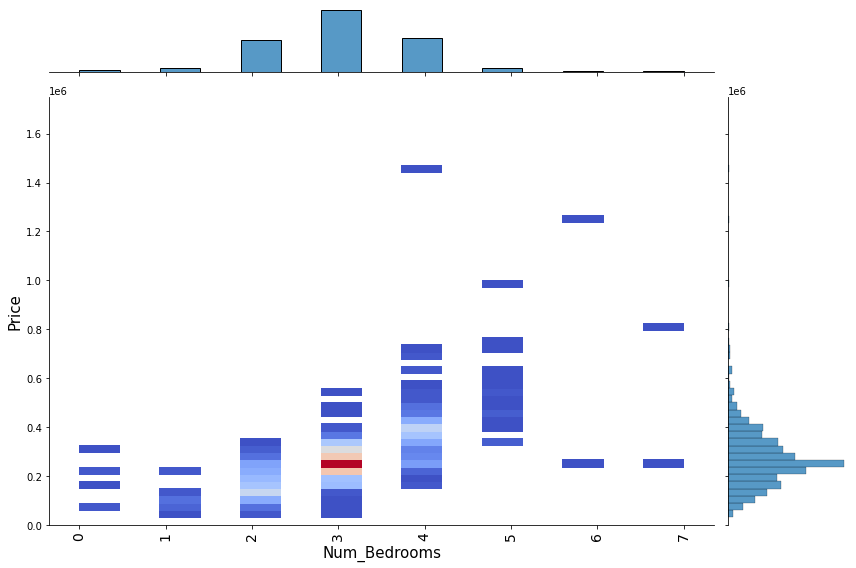

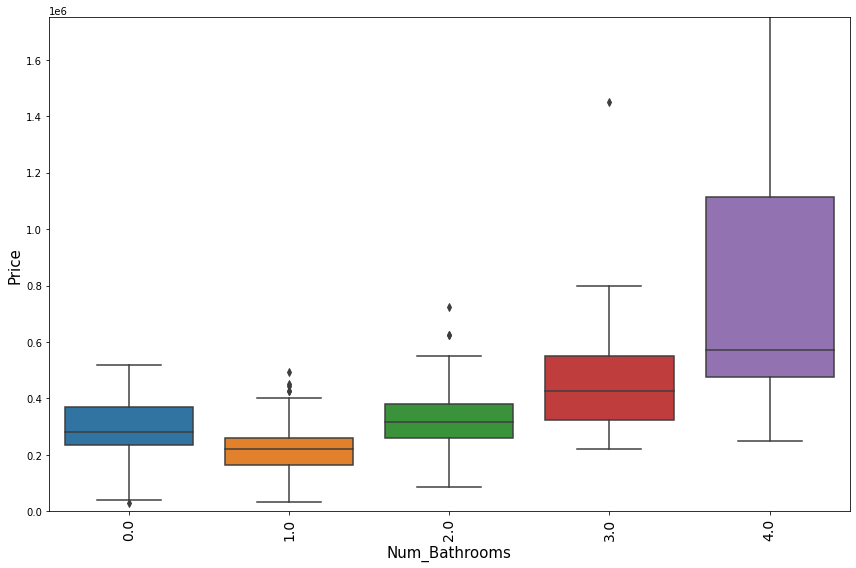

<Figure size 864x576 with 0 Axes>

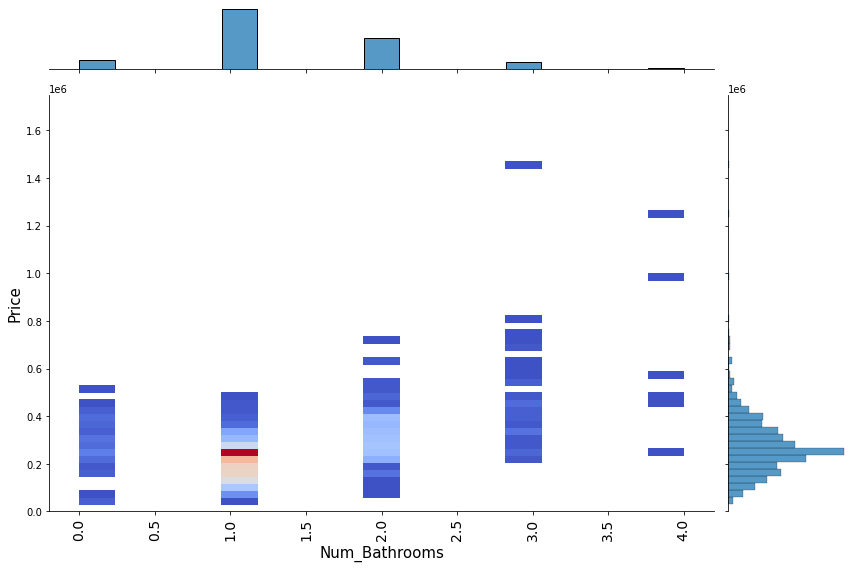

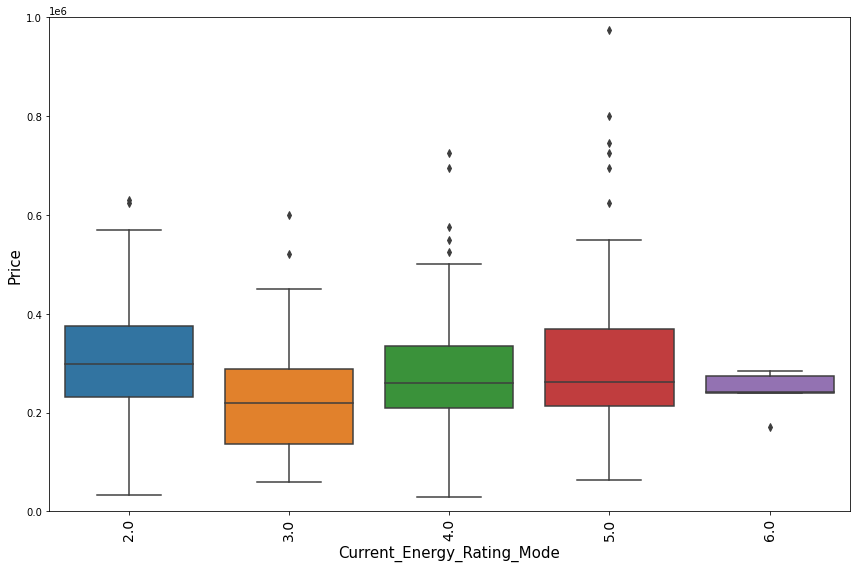

<Figure size 864x576 with 0 Axes>

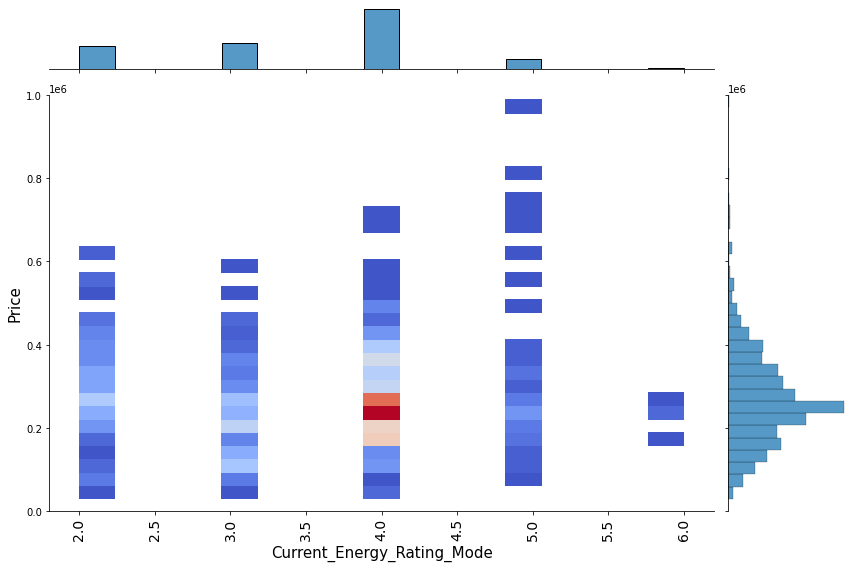

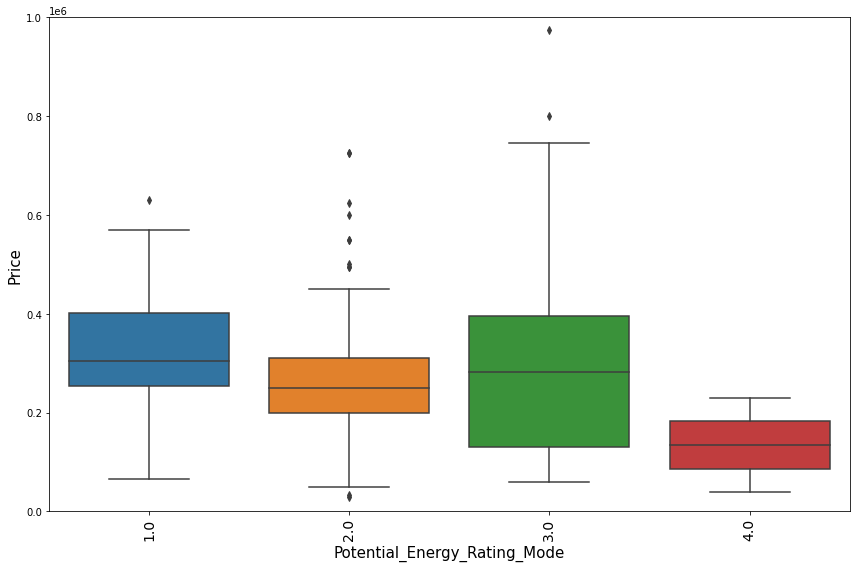

<Figure size 864x576 with 0 Axes>

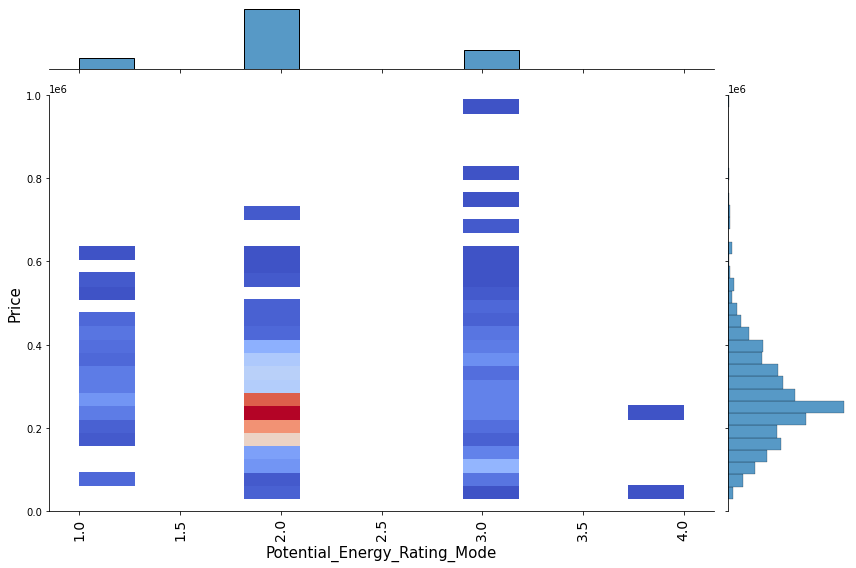

<Figure size 864x576 with 0 Axes>

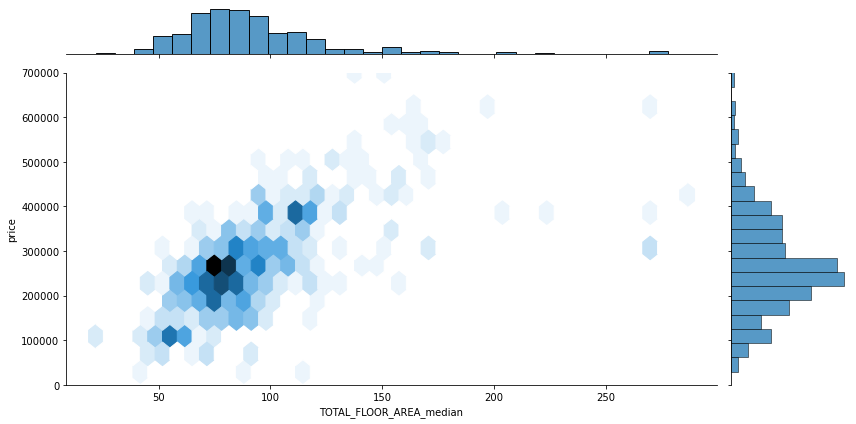

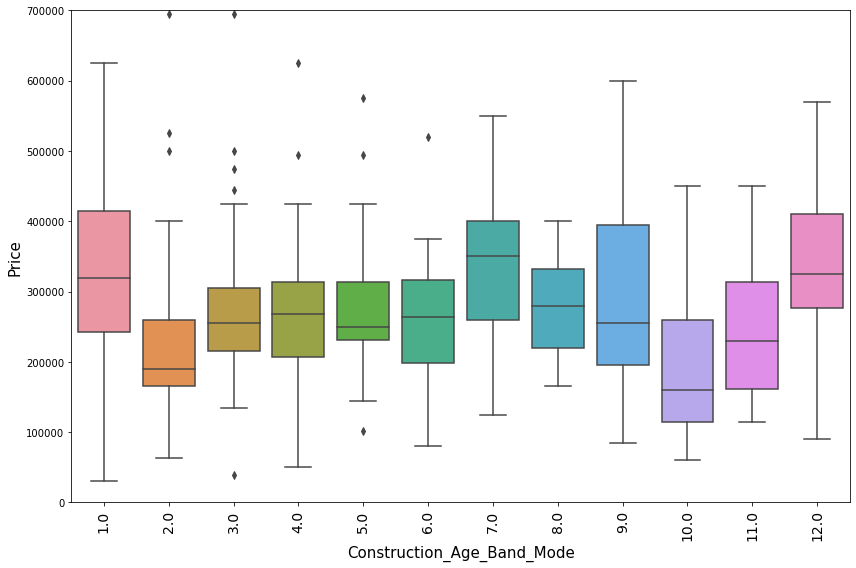

<Figure size 864x576 with 0 Axes>

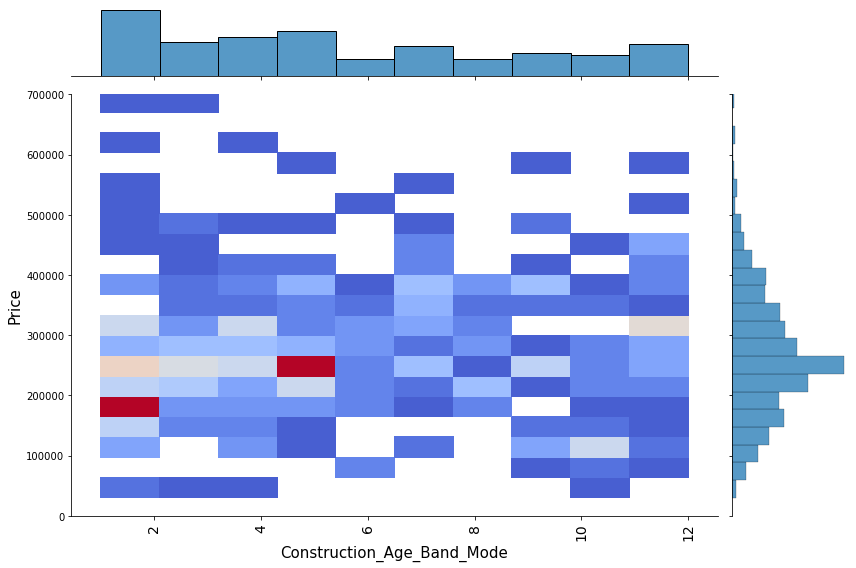

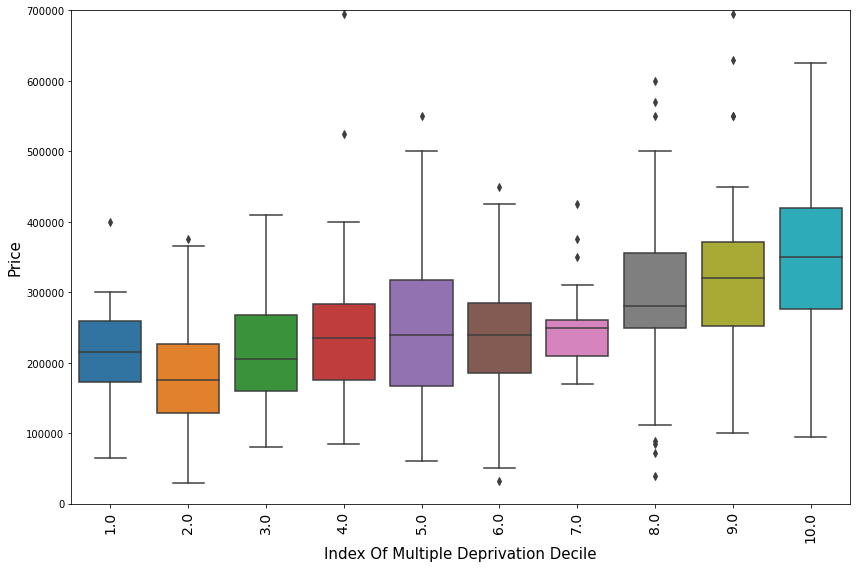

<Figure size 864x576 with 0 Axes>

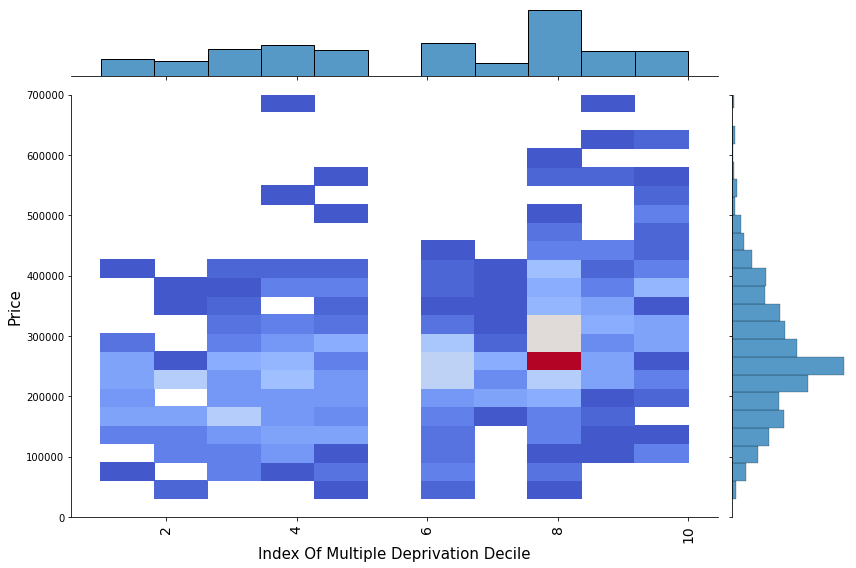

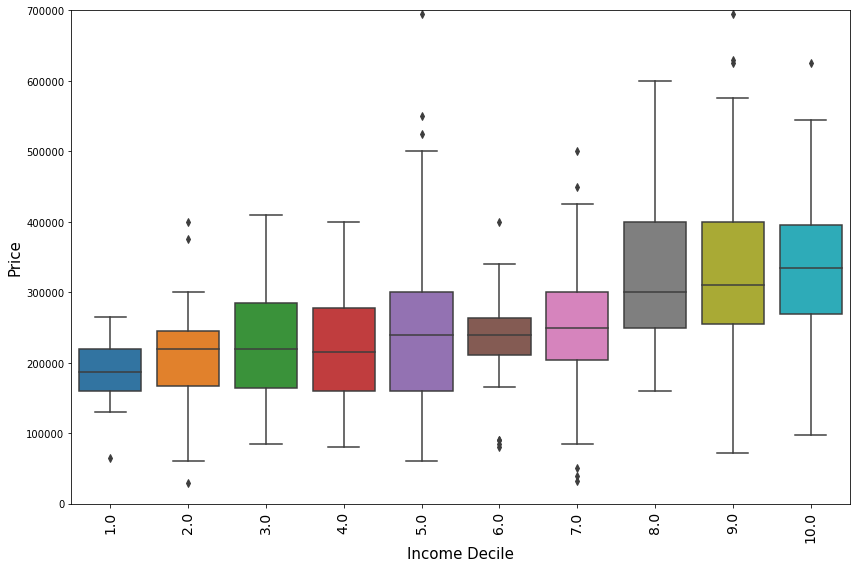

<Figure size 864x576 with 0 Axes>

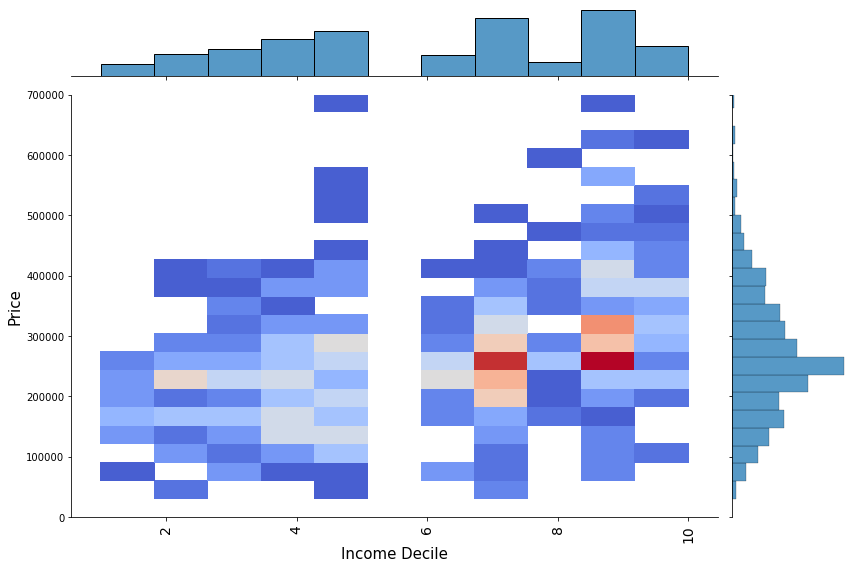

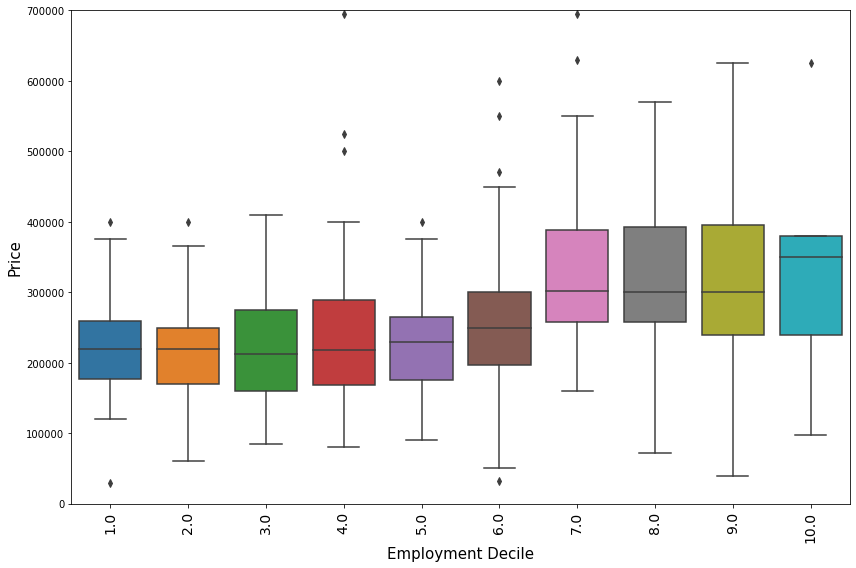

<Figure size 864x576 with 0 Axes>

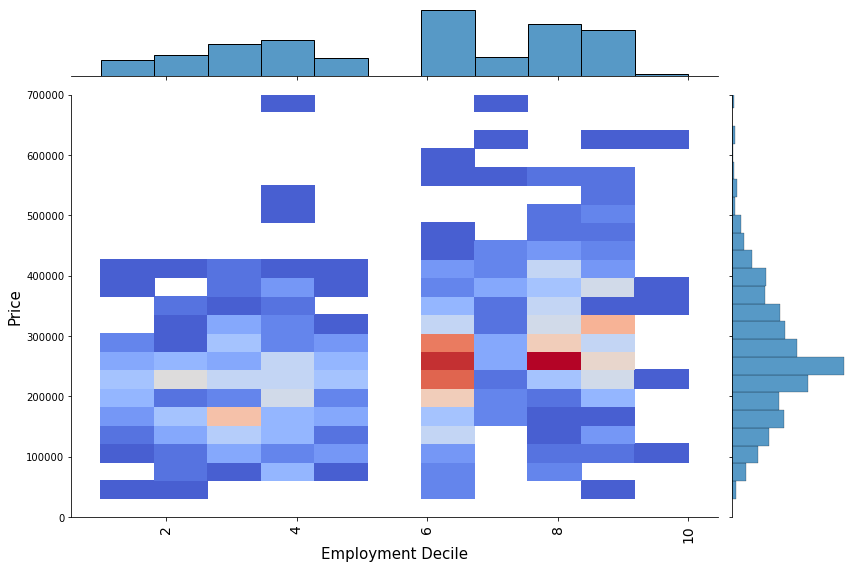

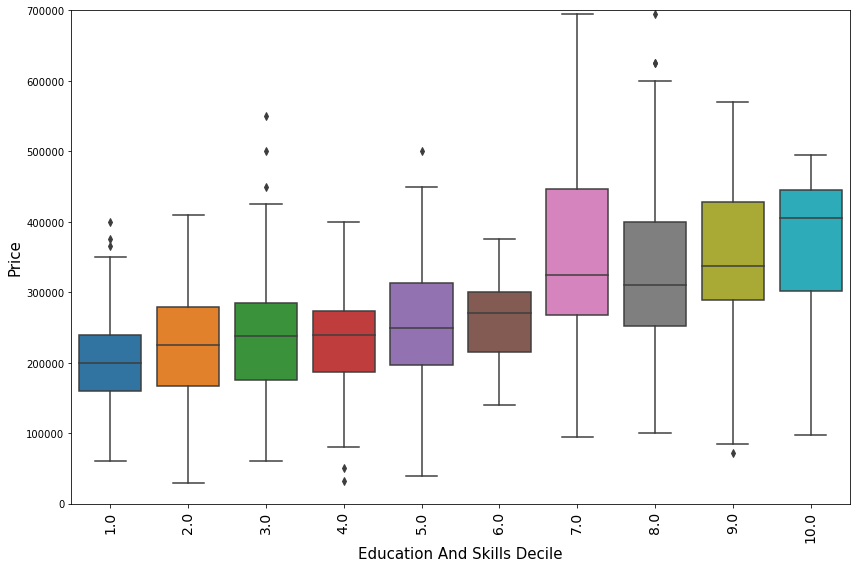

<Figure size 864x576 with 0 Axes>

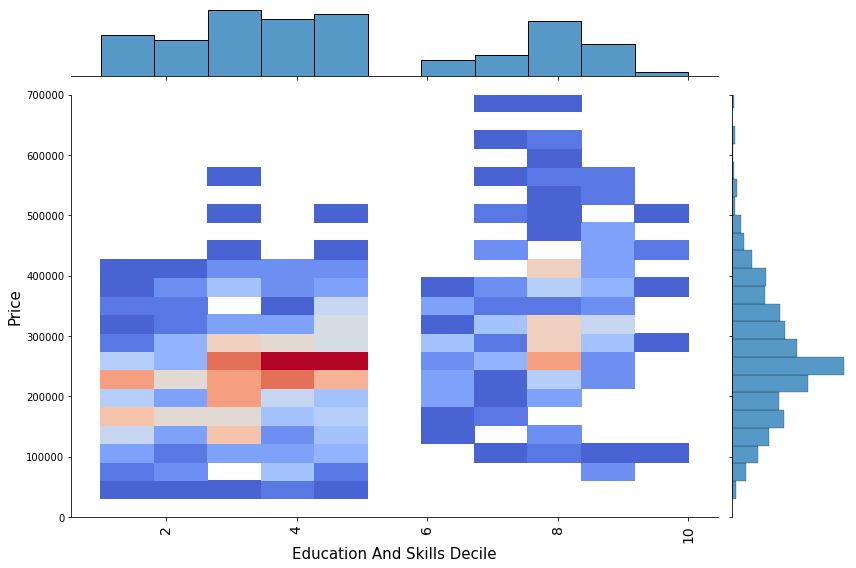

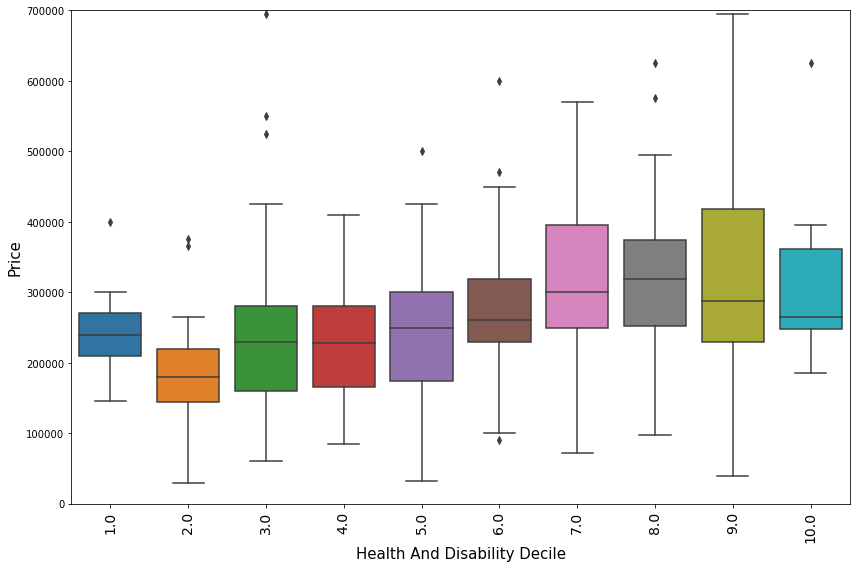

<Figure size 864x576 with 0 Axes>

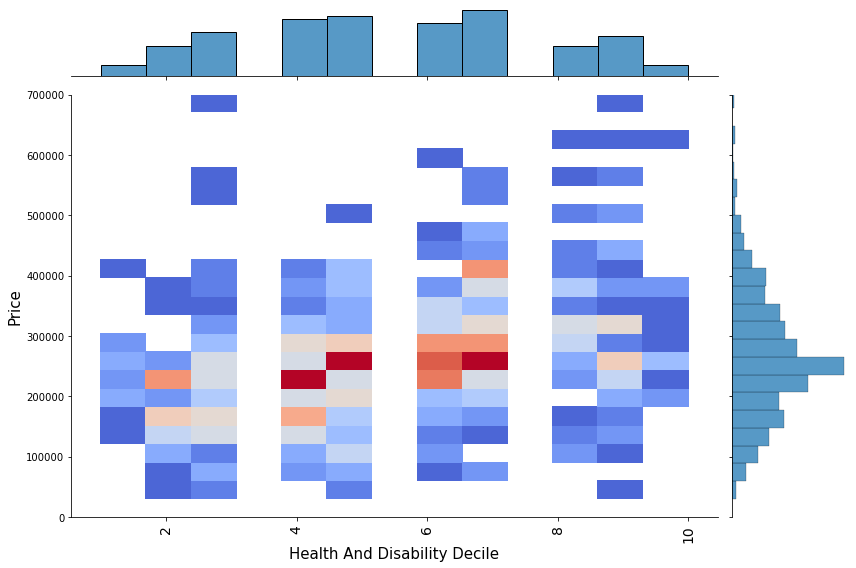

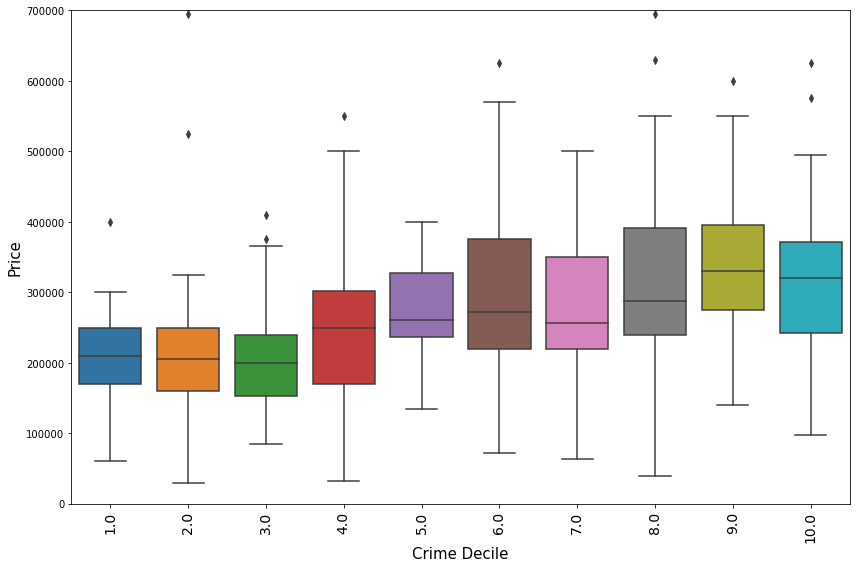

<Figure size 864x576 with 0 Axes>

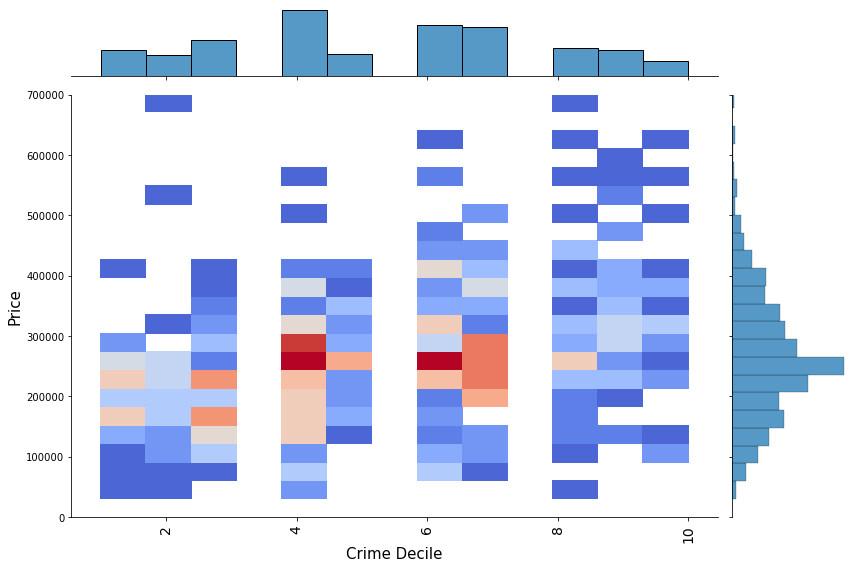

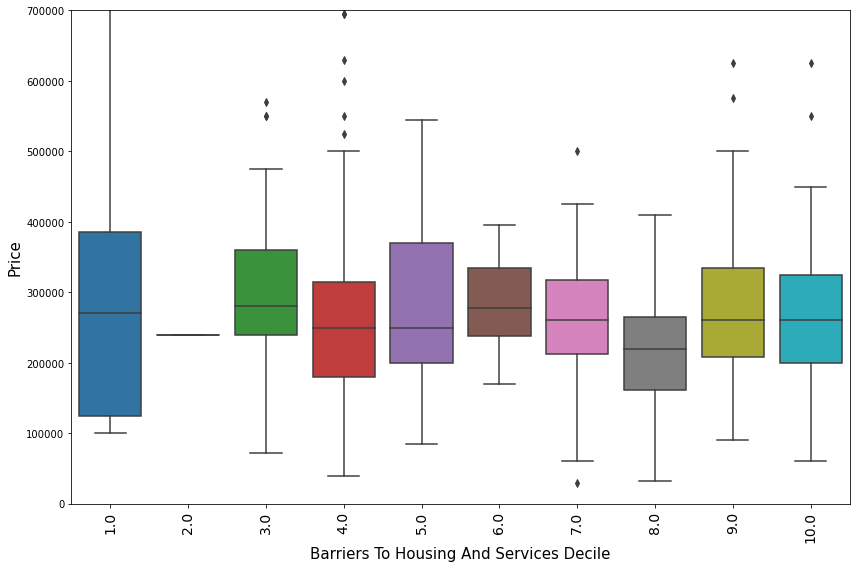

<Figure size 864x576 with 0 Axes>

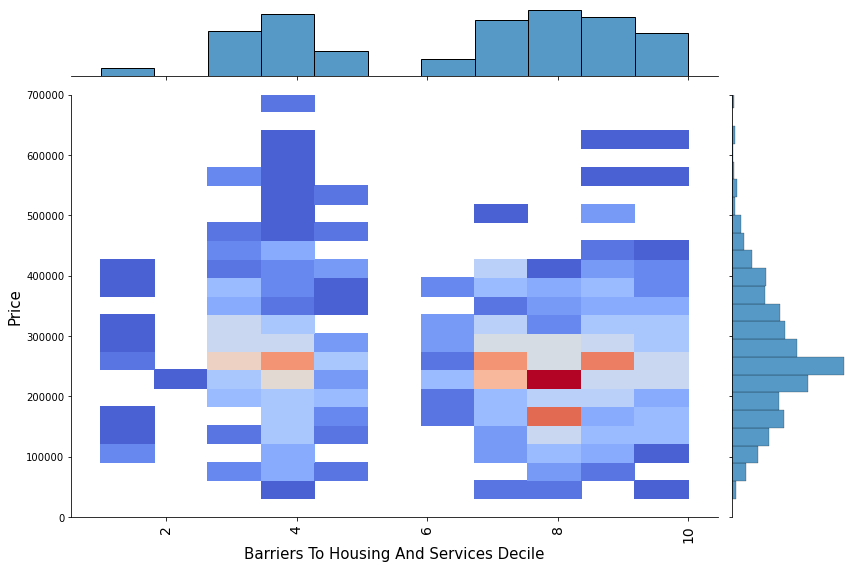

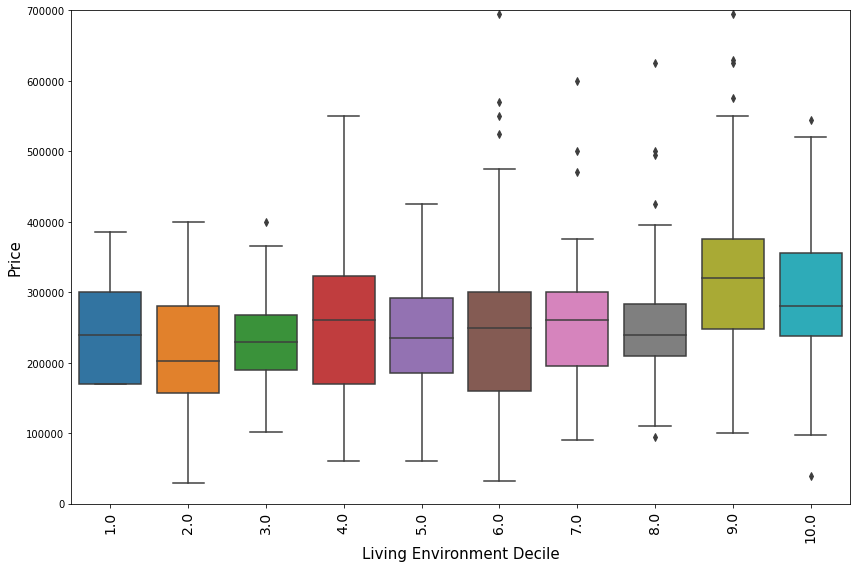

<Figure size 864x576 with 0 Axes>

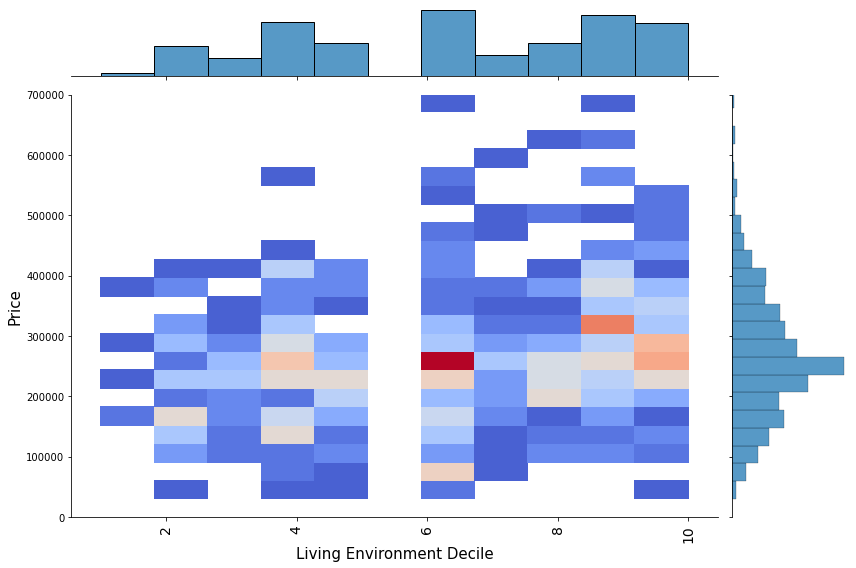

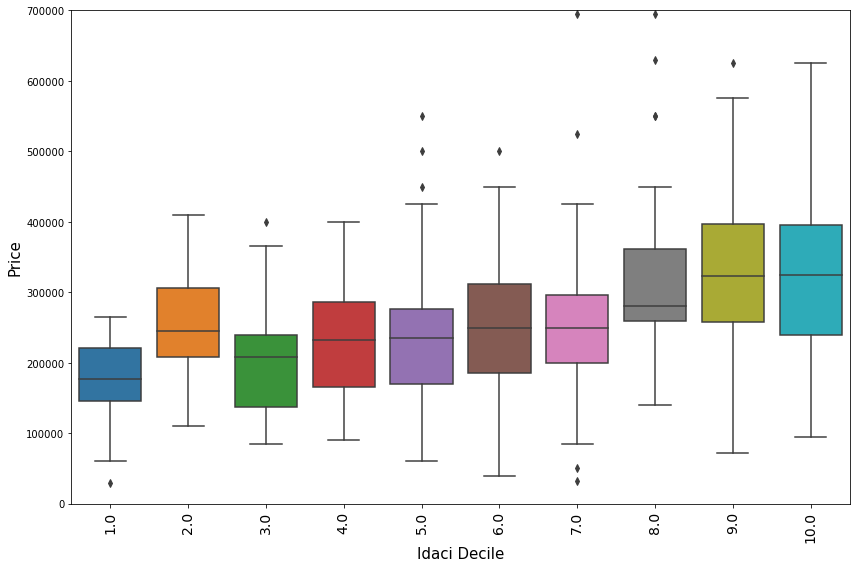

<Figure size 864x576 with 0 Axes>

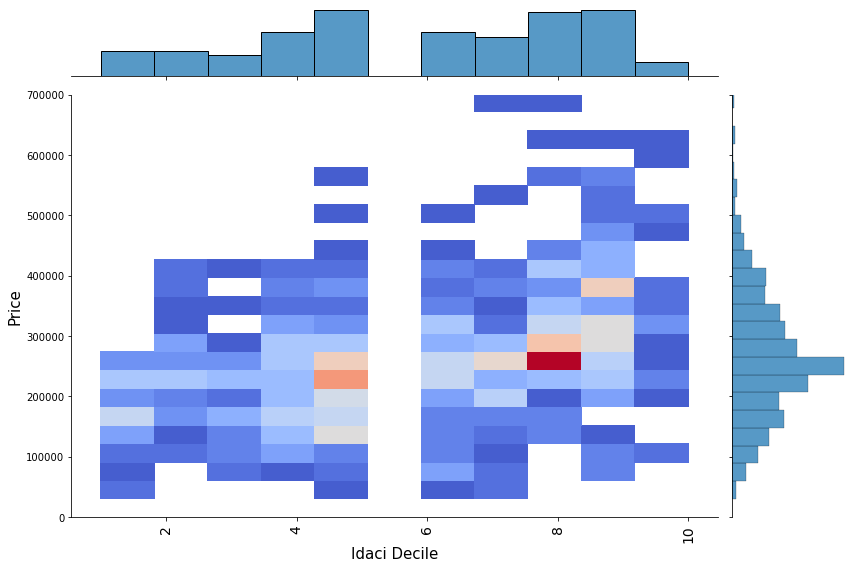

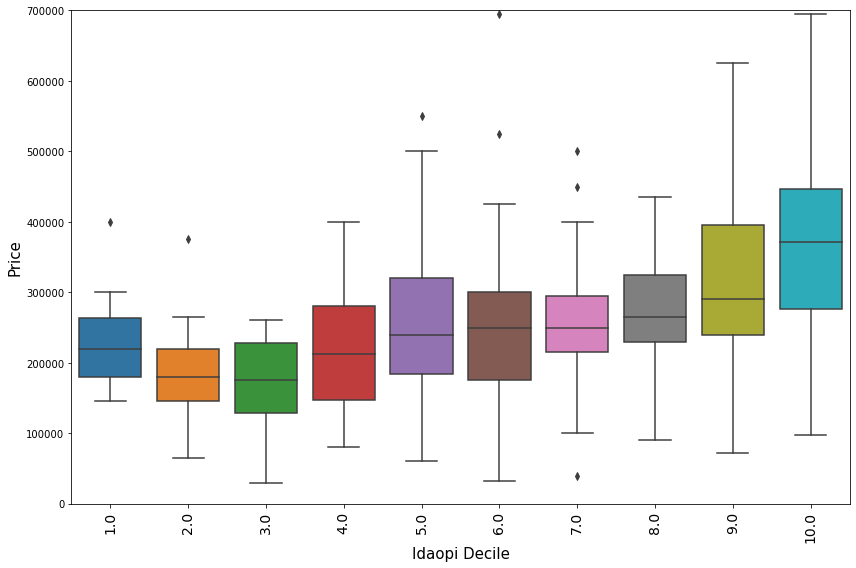

<Figure size 864x576 with 0 Axes>

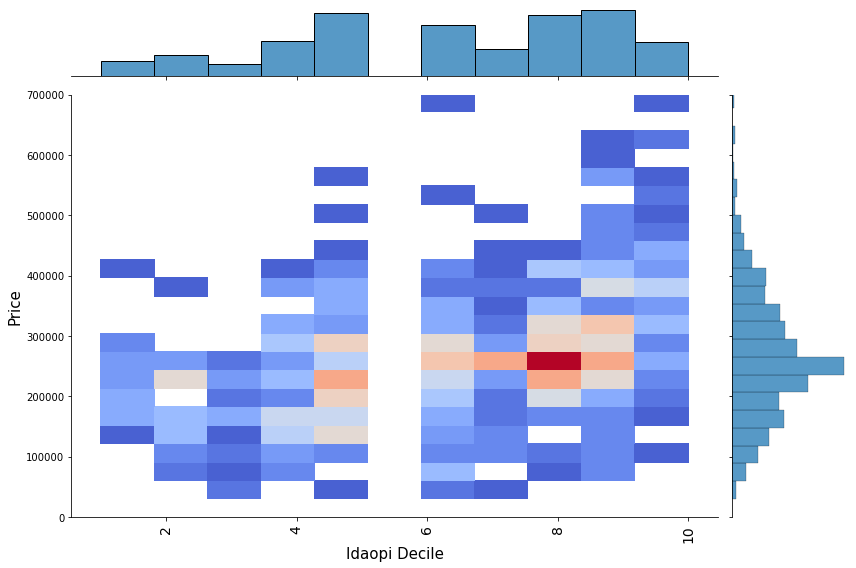

<Figure size 864x576 with 0 Axes>

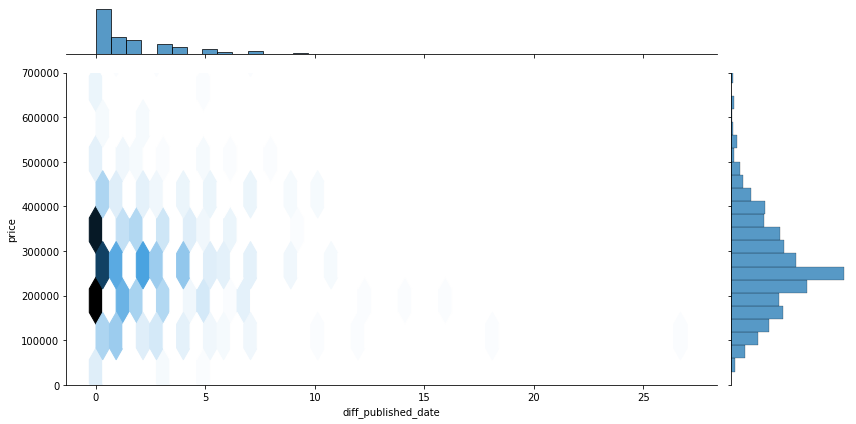

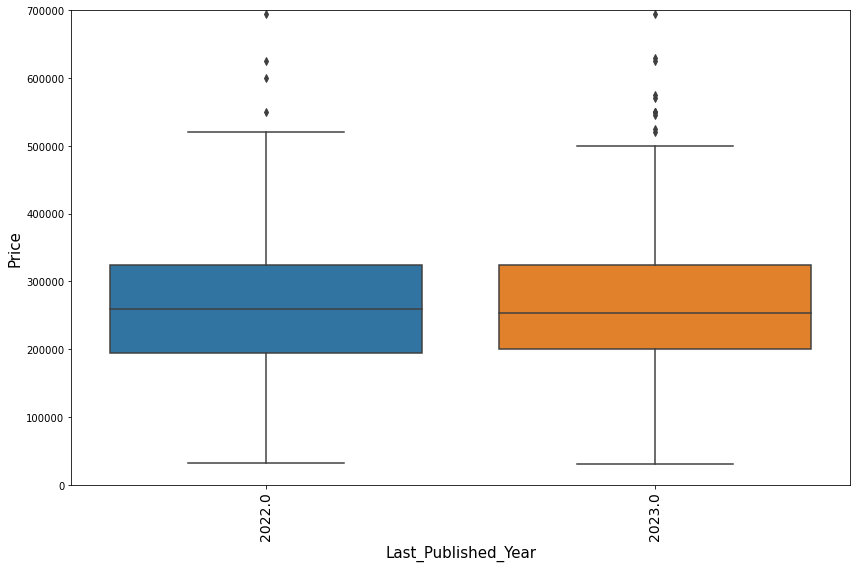

<Figure size 864x576 with 0 Axes>

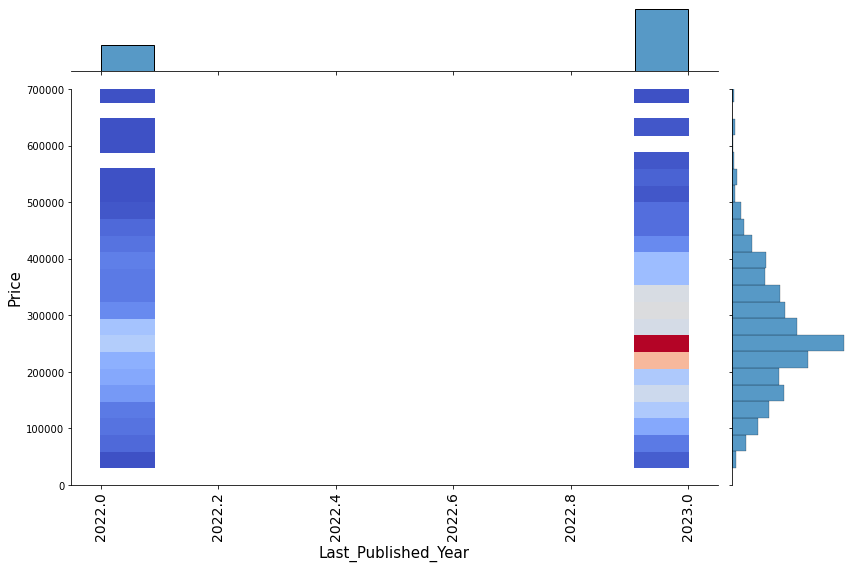

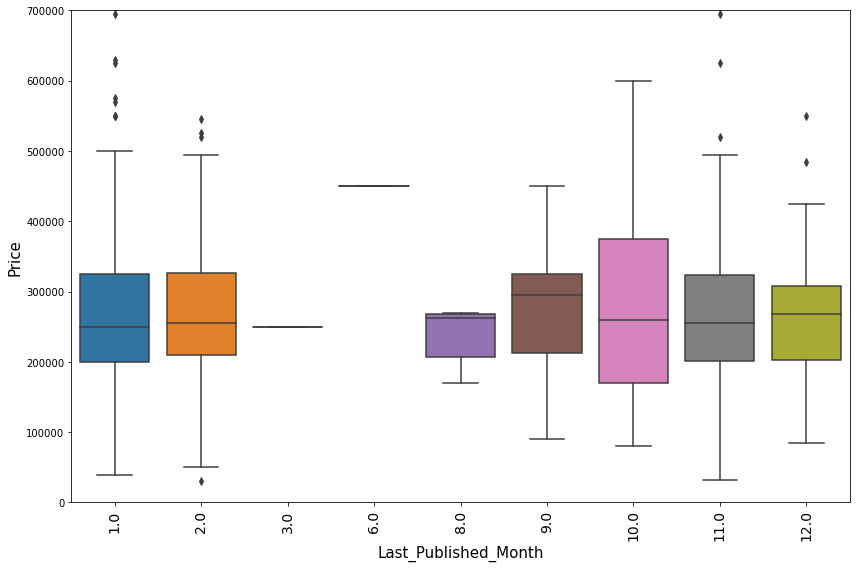

<Figure size 864x576 with 0 Axes>

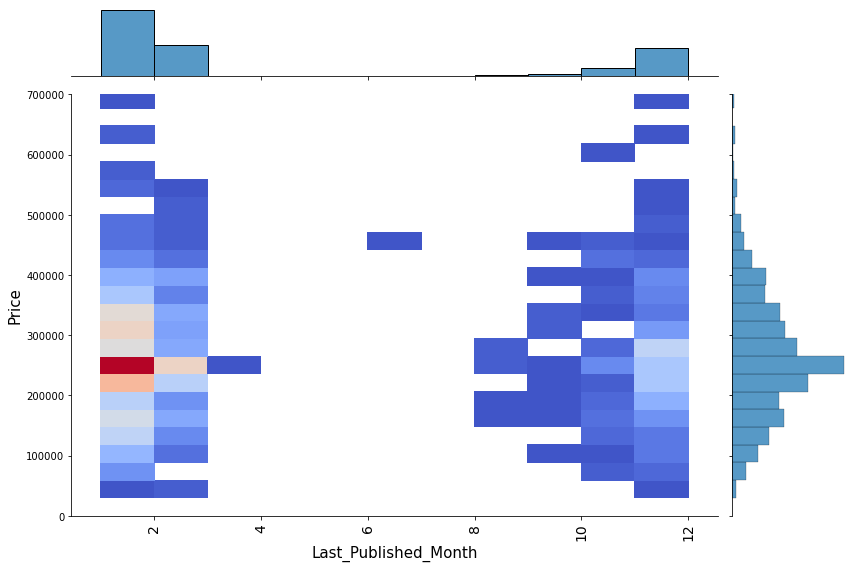

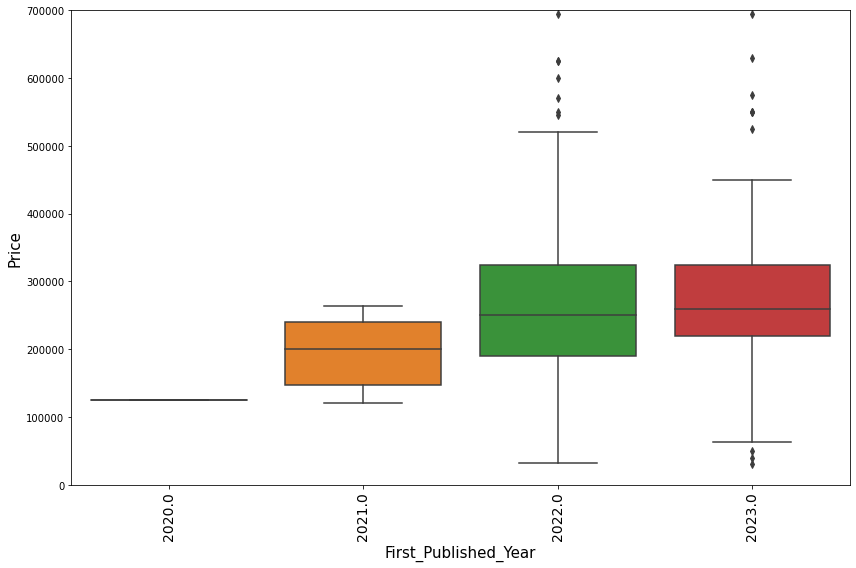

<Figure size 864x576 with 0 Axes>

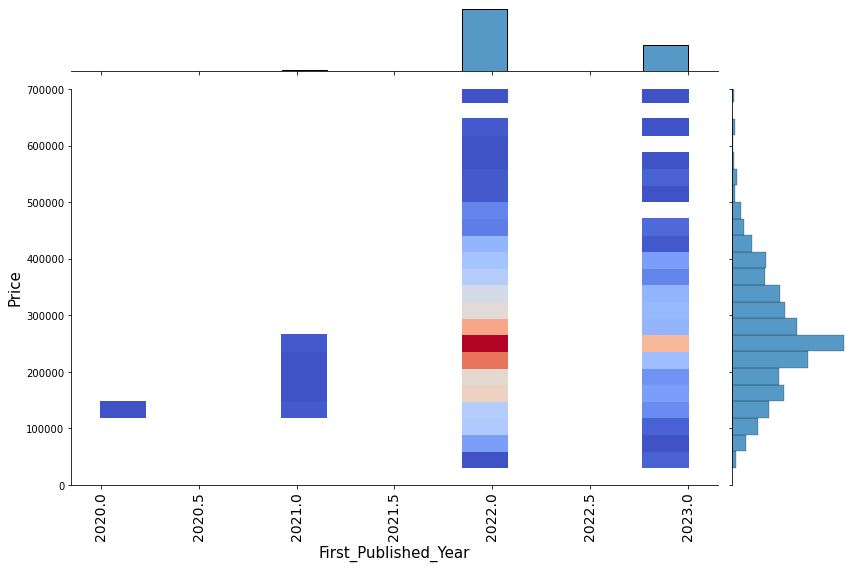

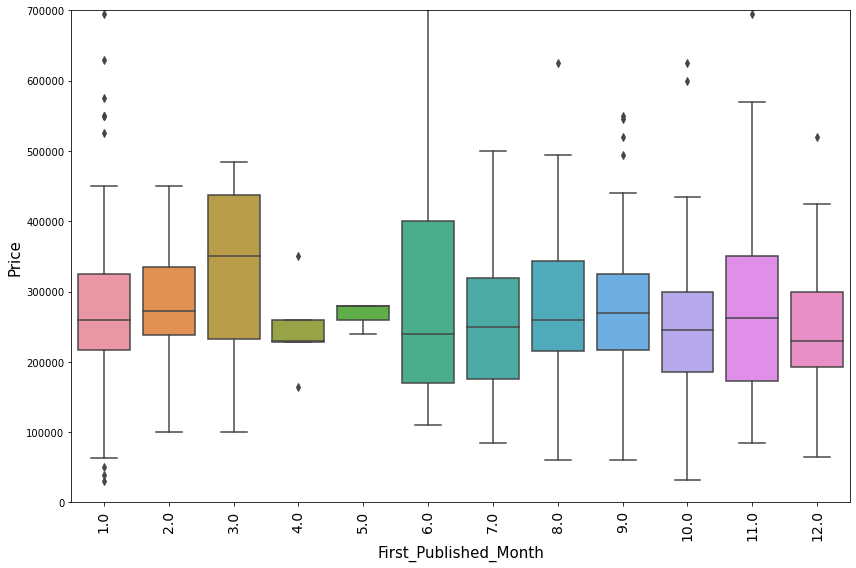

<Figure size 864x576 with 0 Axes>

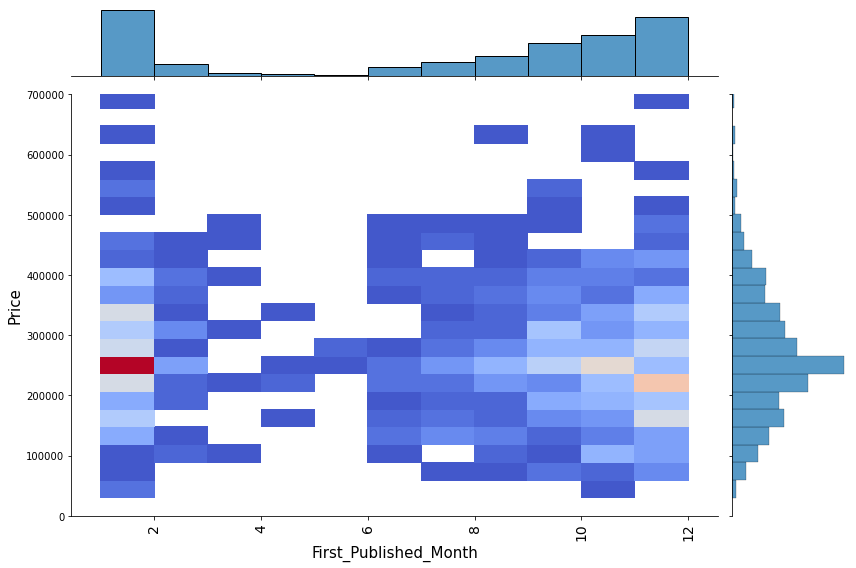

In [16]:
# Create 2D plots for numeric variables (box plots and hist plots for 
# ordered discrete variables and scatter plots for continuous variables)

for col in numeric_cols:
    
    # ignore these columns
    if col in ['latitude', 'longitude', 'price']:
        continue
    
    # continuous variables
    elif col in ['TOTAL_FLOOR_AREA_median', 'diff_published_date']:
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='hex', y_lim=700000)
    
    # ordered discrete variables
    else:
        if col in ['num_bedrooms', 'num_bathrooms']:
            ylim = 1750000
        elif col in ['CURRENT_ENERGY_RATING_mode', 'POTENTIAL_ENERGY_RATING_mode']:
            ylim = 1000000
        else:
            ylim = 700000
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='box', y_lim=ylim)
        plot_graph(zoopla_df_train[col], zoopla_df_train['price'], kind='hist', y_lim=ylim)


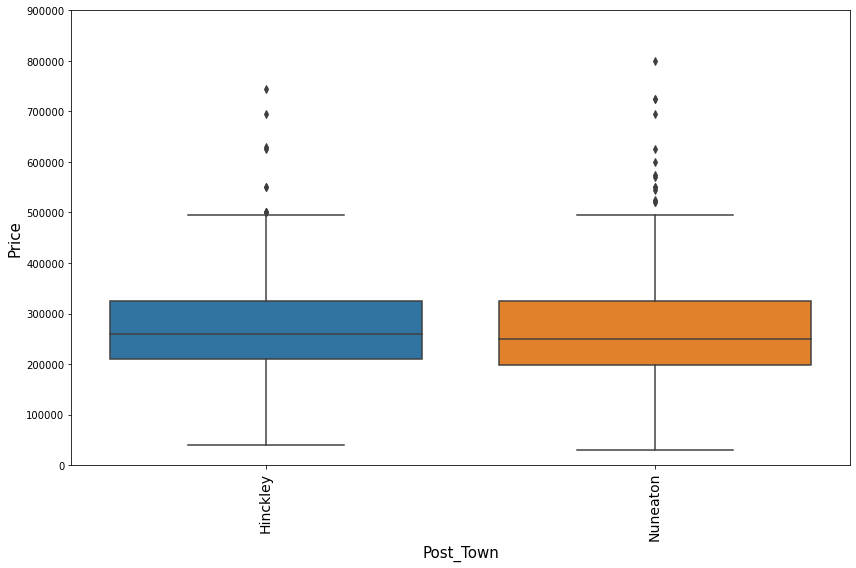

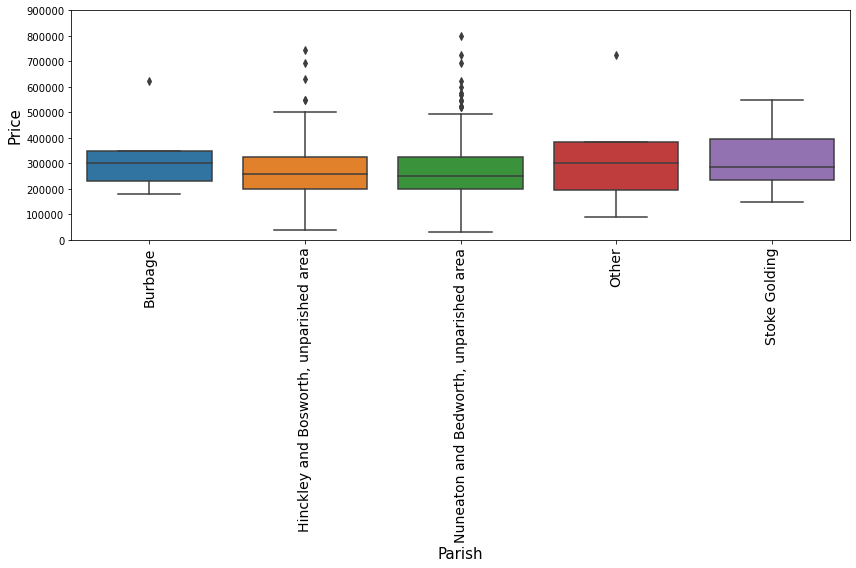

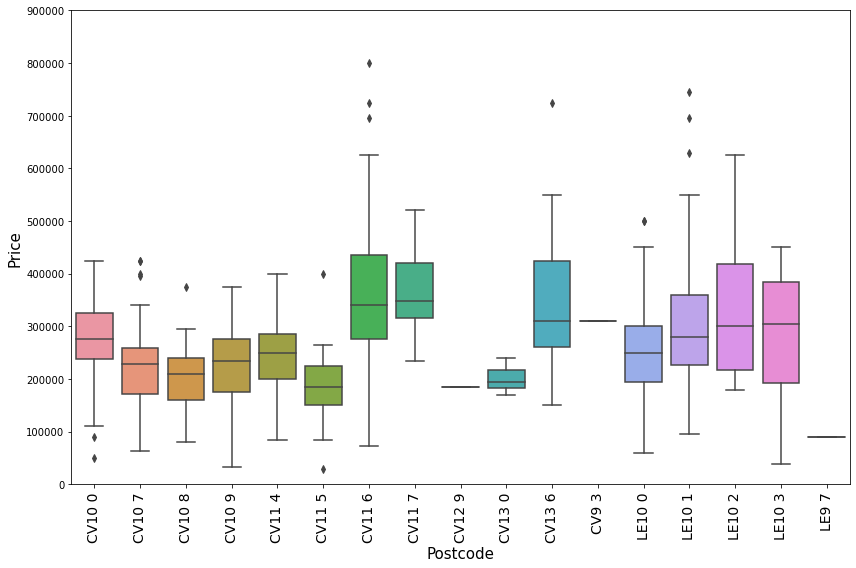

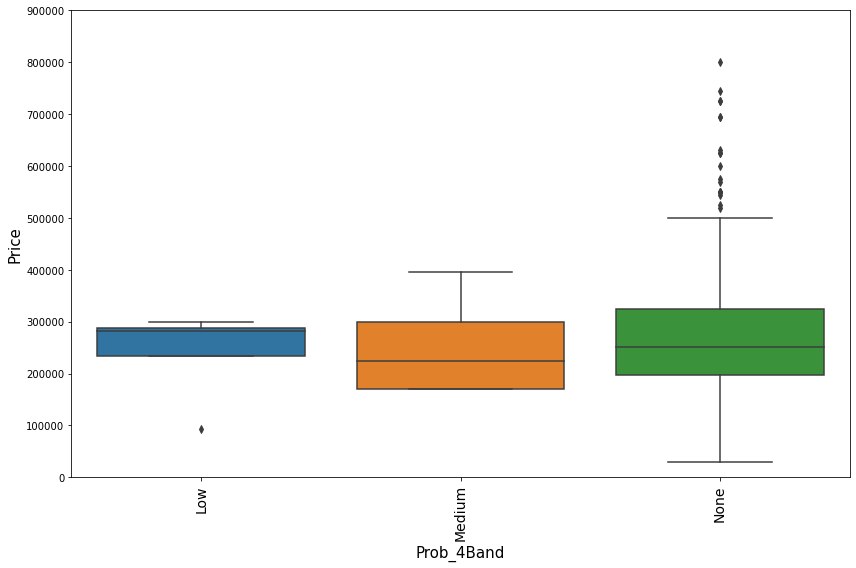

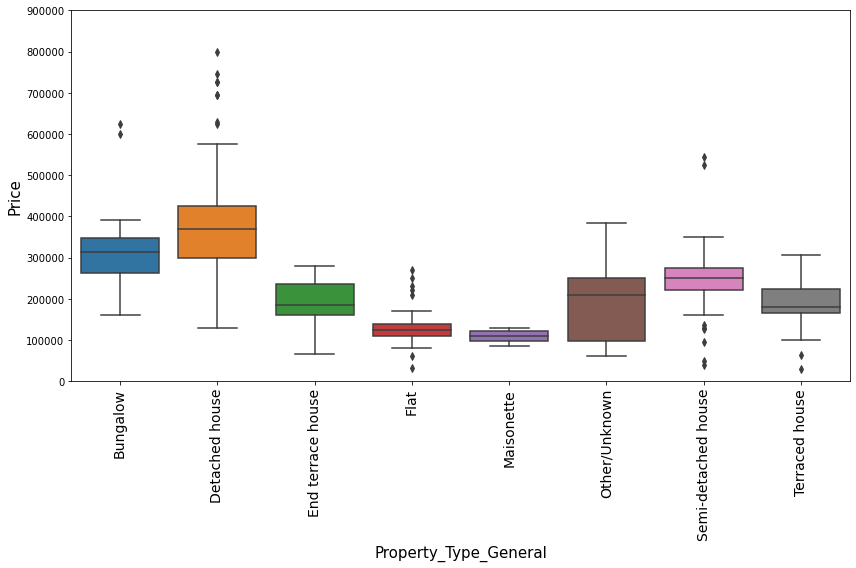

In [17]:
# 2D bar plots for categoric variables

for col in categoric_cols:
    var_order = sorted(zoopla_df_train[col].dropna().unique())
    plot_graph(zoopla_df_train[col], zoopla_df_train['price'],
               kind='box', y_lim=900000, var_order=var_order)

May be best to remove properties that are not in Huneaton or Hnckley as there are very few.

Also, clearly longitude and latitude by themselves are too granular. Let's group these.

### See how postcode is associated with latitude and longitude

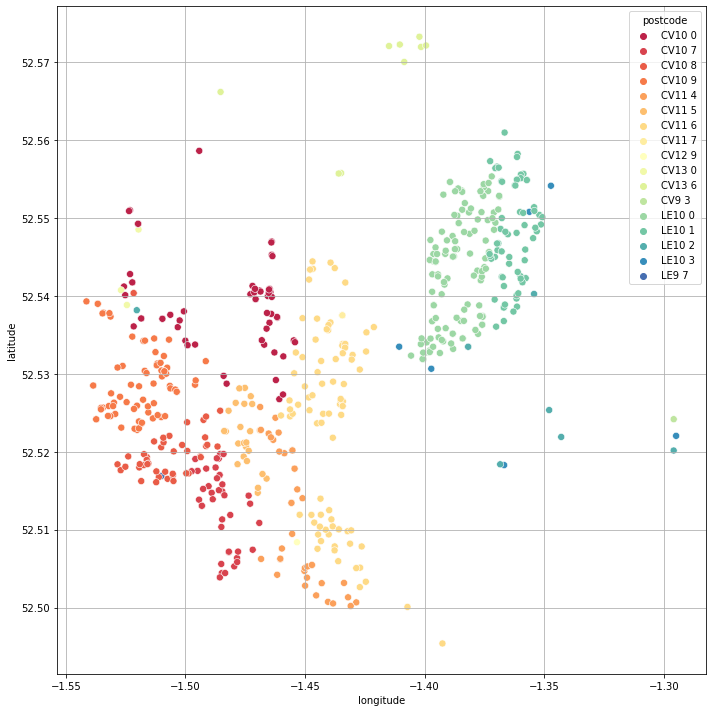

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=zoopla_df_train, x='longitude', y='latitude', hue='postcode', hue_order=sorted(zoopla_df_train['postcode'].unique()),
                palette='Spectral', s=50, legend=True)
plt.grid()
plt.tight_layout()

It's clear some postcodes overalap across areas and some postcodes have very few properties. Can we improve on this to cluster areas together?

### Use K-Means clustering to convert longitudes and latitudes into clusters

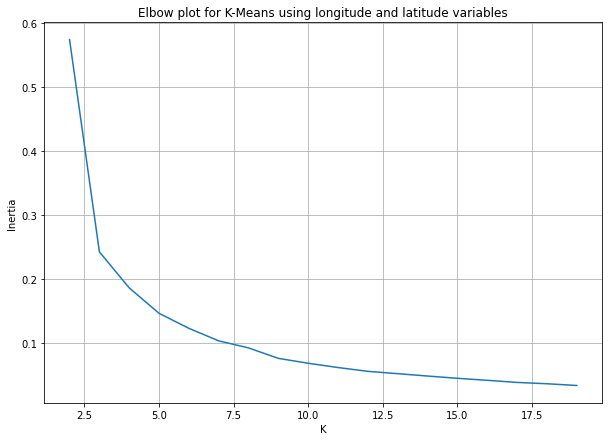

In [19]:
# Try varying numbers of k and create an inertia plot. A good k value will be at an 'elbow'
# meaning that incresing k beyond this will not have much impact

kmeans_info = {}
inertia_array = []

for k in range(2, 20):
    kmeans_k = KMeans(k, random_state=40)
    kmeans_k.fit(zoopla_df_train[['longitude', 'latitude']])
    kmeans_info[k] = kmeans_k
    inertia_array.append(kmeans_k.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(2,20), inertia_array)
plt.title('Elbow plot for K-Means using longitude and latitude variables')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

It seems that k = 8 is a good compromise. Let's look at this in more detail

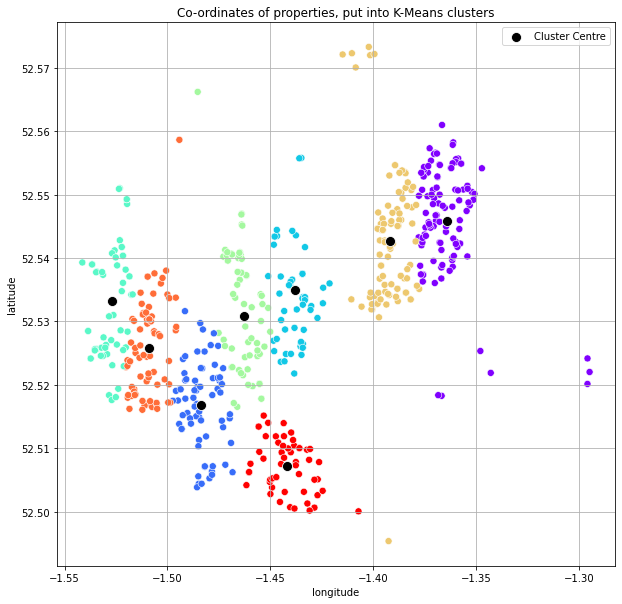

In [20]:
k_final = 8

plt.figure(figsize=(10, 10))
sns.scatterplot(data=zoopla_df_train, x='longitude', y='latitude', hue=kmeans_info[k_final].labels_, 
                palette='rainbow', s=50, legend=None)
sns.scatterplot(x=kmeans_info[k_final].cluster_centers_[:,0], y=kmeans_info[k_final].cluster_centers_[:,1], 
                color='k', s=100, label='Cluster Centre')
plt.title('Co-ordinates of properties, put into K-Means clusters')
plt.legend(fontsize=10)
plt.grid()
plt.show()

In [21]:
kmeans_final = KMeans(k_final, random_state=40)
kmeans_final.fit(zoopla_df_train[['longitude', 'latitude']])

KMeans(random_state=40)

In [22]:
# for each property, choose nearest cluster and put as new column
zoopla_df_train['coordinate_cluster'] = kmeans_final.transform(zoopla_df_train[['longitude', 'latitude']]).argmin(axis=1)

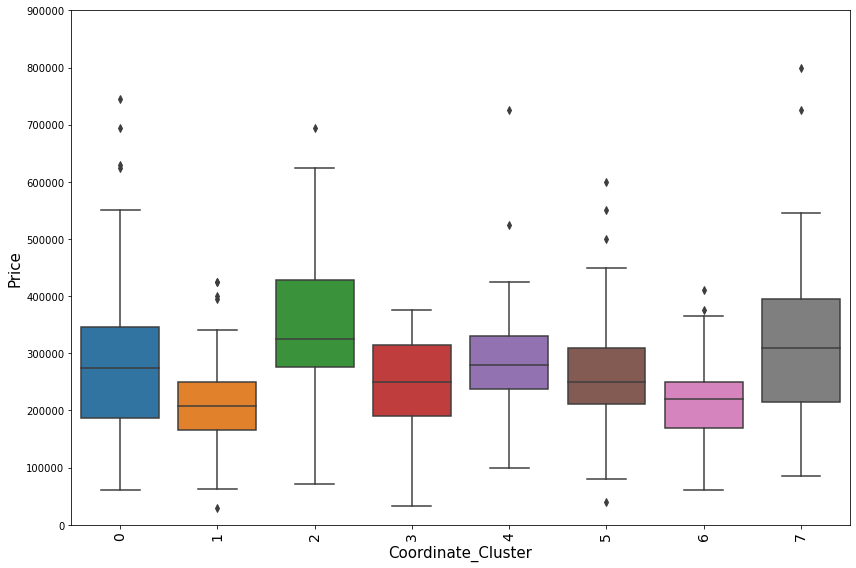

In [23]:
# see how this new column correlates with house price
plot_graph(zoopla_df_train['coordinate_cluster'], zoopla_df_train['price'], 
               kind='box', y_lim=900000, var_order=range(0, k_final))

This shows a reasonable amount of variation so we will use k = 8 for the feature engineering step.